# Telecom Churn Problem
(Using this model telecom companies can roll out offers specific to the customer who are predicted to churn, which will
lead to a reduction in the churn rate.)


###### The data set was taken from the UCI repository

In [1]:
# Importing all the necessary libraries
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# Importing and Merging of the Data

In [3]:
internet=pd.read_csv("internet_data.csv")
internet.head()


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
churn=pd.read_csv("churn_data.csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer=pd.read_csv("customer_data.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
# Merging the data frames on customer Id and performing Inner Join
df1=pd.merge(internet,customer, on="customerID",how="inner")


In [7]:
telecom=pd.merge(df1,churn, on="customerID",how="inner")

### Inspecting the data frame

In [8]:
telecom

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No,Female,...,Yes,Yes,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No,Male,...,Yes,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
telecom.shape

(7043, 21)

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data prepration

In [11]:
# Mapping all the "Yes" to 1 and "No" to 0
varlist=["PhoneService","PaperlessBilling","Churn","Partner","Dependents"]
telecom[varlist]=telecom[varlist].apply(lambda x:x.map({"Yes":1,"No":0}))
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [12]:
# Creating dummy variables
dummy1=pd.get_dummies(telecom[["PaymentMethod","Contract","gender","InternetService"]],drop_first=True)
dummy1.head()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,1,0


In [13]:
telecom=pd.concat([dummy1,telecom],axis=1)

In [14]:
telecom.head()

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No,customerID,MultipleLines,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,0,7590-VHVEG,No phone service,...,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,1,1,0,1,0,0,5575-GNVDE,No,...,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,0,0,1,0,0,1,0,0,3668-QPYBK,No,...,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,1,0,1,0,0,7795-CFOCW,No phone service,...,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,1,0,0,0,0,1,0,9237-HQITU,No,...,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
# Creating dummies for other columns as well
m1=pd.get_dummies(telecom["MultipleLines"],prefix="MultipleLines")
m1=m1.drop("MultipleLines_No phone service",axis=1)
telecom=pd.concat([m1,telecom],axis=1)
m1.head()


,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [16]:
m2=pd.get_dummies(telecom["OnlineSecurity"],prefix="OnlineSecurity")
m2=m2.drop("OnlineSecurity_No internet service",axis=1)
m2.head()


,OnlineSecurity_No,OnlineSecurity_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [17]:
telecom=pd.concat([m2,telecom],axis=1)

In [18]:
m3=pd.get_dummies(telecom["OnlineBackup"],prefix="OnlineBackup")
m3.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [19]:
m3=m3.drop("OnlineBackup_No internet service",axis=1)
telecom=pd.concat([m3,telecom],axis=1)

In [20]:
# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [21]:
telecom.head()

,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,...,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,1,0,0,0,0,1,0,0,...,29.85,0,1,0,1,0,1,0,1,0
1,1,0,0,1,1,0,0,0,1,1,...,1889.5,0,0,1,1,0,1,0,1,0
2,0,1,0,1,1,0,0,0,1,0,...,108.15,1,1,0,1,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,1,...,1840.75,0,0,1,0,1,1,0,1,0
4,1,0,1,0,1,0,0,1,0,0,...,151.65,1,1,0,1,0,1,0,1,0


In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OnlineBackup_No                        7043 non-null   uint8  
 1   OnlineBackup_Yes                       7043 non-null   uint8  
 2   OnlineSecurity_No                      7043 non-null   uint8  
 3   OnlineSecurity_Yes                     7043 non-null   uint8  
 4   MultipleLines_No                       7043 non-null   uint8  
 5   MultipleLines_Yes                      7043 non-null   uint8  
 6   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 7   PaymentMethod_Electronic check         7043 non-null   uint8  
 8   PaymentMethod_Mailed check             7043 non-null   uint8  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  gend

In [23]:
#Dropping the duplicate columns
telecom=telecom.drop(["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","gender","Contract","PaymentMethod"],axis=1)

In [24]:
#Converting the Total charges column to numeric type
telecom["TotalCharges"]=pd.to_numeric(telecom["TotalCharges"],errors='coerce')

In [25]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OnlineBackup_No                        7043 non-null   uint8  
 1   OnlineBackup_Yes                       7043 non-null   uint8  
 2   OnlineSecurity_No                      7043 non-null   uint8  
 3   OnlineSecurity_Yes                     7043 non-null   uint8  
 4   MultipleLines_No                       7043 non-null   uint8  
 5   MultipleLines_Yes                      7043 non-null   uint8  
 6   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 7   PaymentMethod_Electronic check         7043 non-null   uint8  
 8   PaymentMethod_Mailed check             7043 non-null   uint8  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  gend

In [26]:
# Final DataFrame
telecom.head()

,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,...,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,1,0,0,0,0,1,0,0,...,29.85,0,1,0,1,0,1,0,1,0
1,1,0,0,1,1,0,0,0,1,1,...,1889.50,0,0,1,1,0,1,0,1,0
2,0,1,0,1,1,0,0,0,1,0,...,108.15,1,1,0,1,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,1,...,1840.75,0,0,1,0,1,1,0,1,0
4,1,0,1,0,1,0,0,1,0,0,...,151.65,1,1,0,1,0,1,0,1,0


In [27]:
#Checking for missing values
telecom.isnull().sum()

OnlineBackup_No                           0
OnlineBackup_Yes                          0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                    

In [28]:
# We have 11 missing values therefor removing those values
telecom=telecom[~np.isnan(telecom["TotalCharges"])]


In [29]:
telecom.isnull().sum()

OnlineBackup_No                          0
OnlineBackup_Yes                         0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Contract_One year                        0
Contract_Two year                        0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn      

In [30]:
# We have deleted all of the missing values of the data frame

# Data Modelling

In [31]:
# Performing test train split
X=telecom.drop(["Churn","customerID"],axis=1)
X.head()

,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,...,MonthlyCharges,TotalCharges,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,1,0,0,0,0,1,0,0,...,29.85,29.85,1,0,1,0,1,0,1,0
1,1,0,0,1,1,0,0,0,1,1,...,56.95,1889.50,0,1,1,0,1,0,1,0
2,0,1,0,1,1,0,0,0,1,0,...,53.85,108.15,1,0,1,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,1,...,42.30,1840.75,0,1,0,1,1,0,1,0
4,1,0,1,0,1,0,0,1,0,0,...,70.70,151.65,1,0,1,0,1,0,1,0


In [32]:
y=telecom["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [34]:
X_train.shape

(4922, 30)

In [35]:
X_test.shape

(2110, 30)

# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
scaler=StandardScaler()
X_train[["MonthlyCharges","TotalCharges","tenure"]]=scaler.fit_transform(X_train[["MonthlyCharges","TotalCharges","tenure"]])

In [38]:
X_train.head()

,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,...,MonthlyCharges,TotalCharges,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,1,1,0,0,1,0,0,0,0,...,-0.338074,-0.276449,1,0,1,0,1,0,1,0
5790,0,1,1,0,0,0,0,1,0,0,...,-0.464443,-0.112702,1,0,1,0,0,1,0,1
6498,0,1,1,0,1,0,0,1,0,0,...,0.581425,-0.974430,0,1,1,0,1,0,1,0
880,0,1,0,1,1,0,0,1,0,0,...,1.505913,-0.550676,0,1,0,1,0,1,0,1
2784,1,0,1,0,1,0,0,0,0,0,...,1.106854,-0.835971,0,1,0,1,0,1,0,1


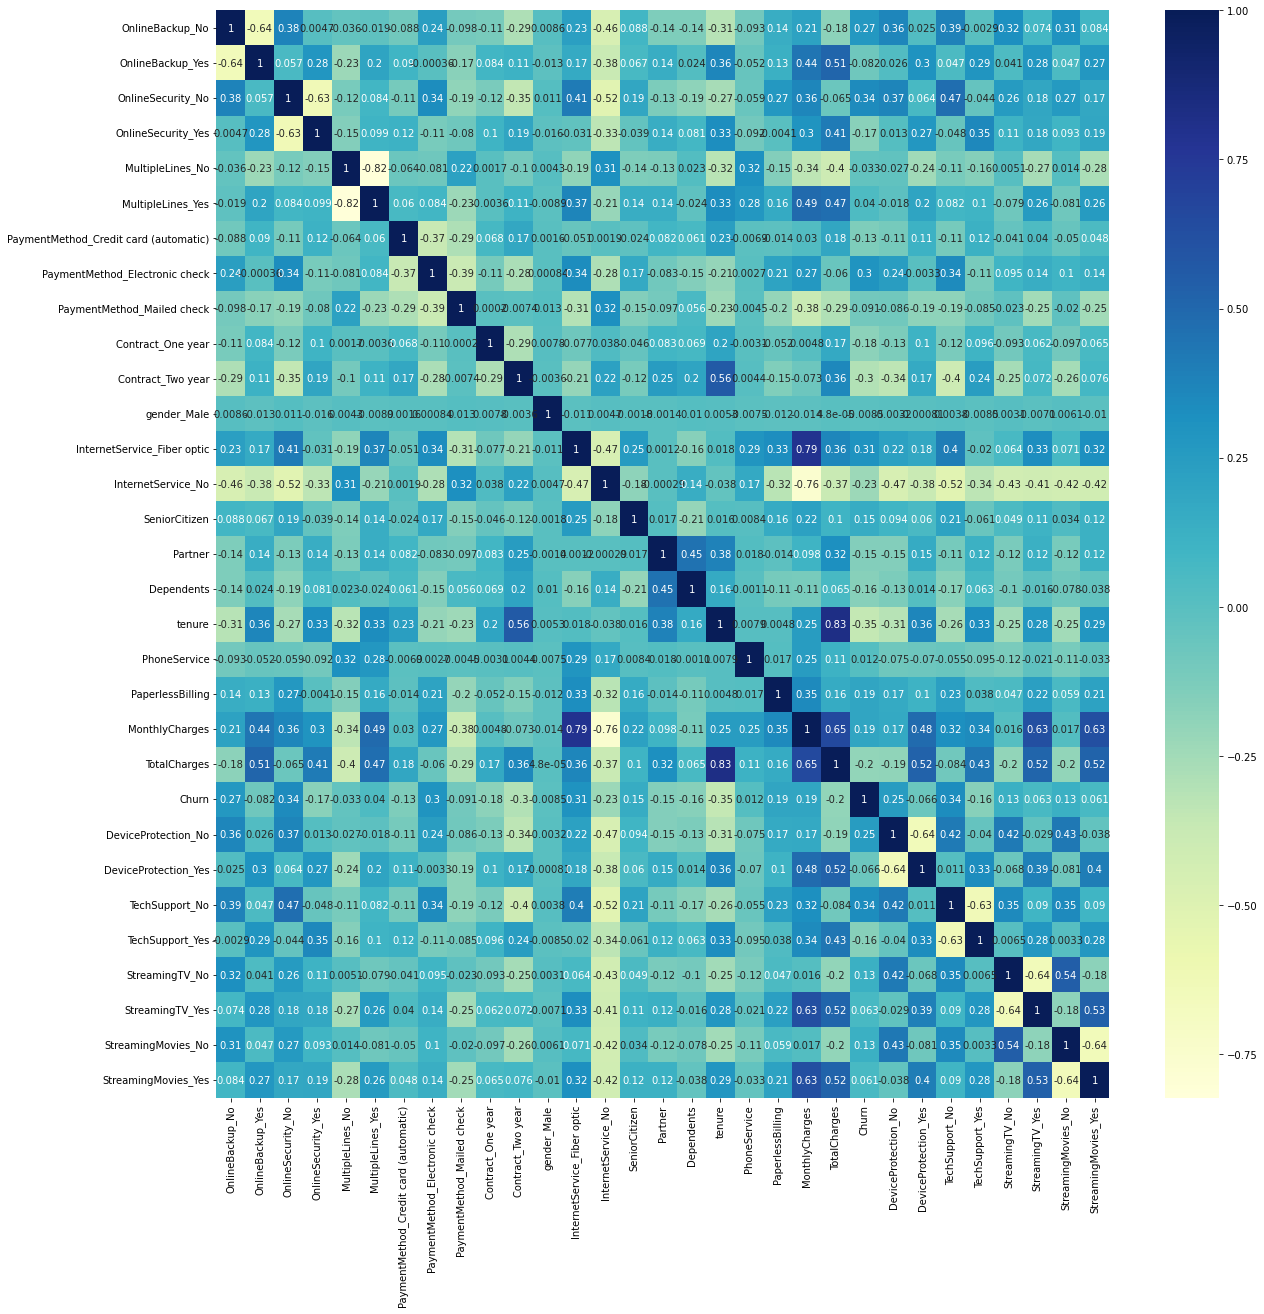

In [39]:
# Making the Co Relation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(telecom.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [40]:
# Removing some of the redundant variables
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

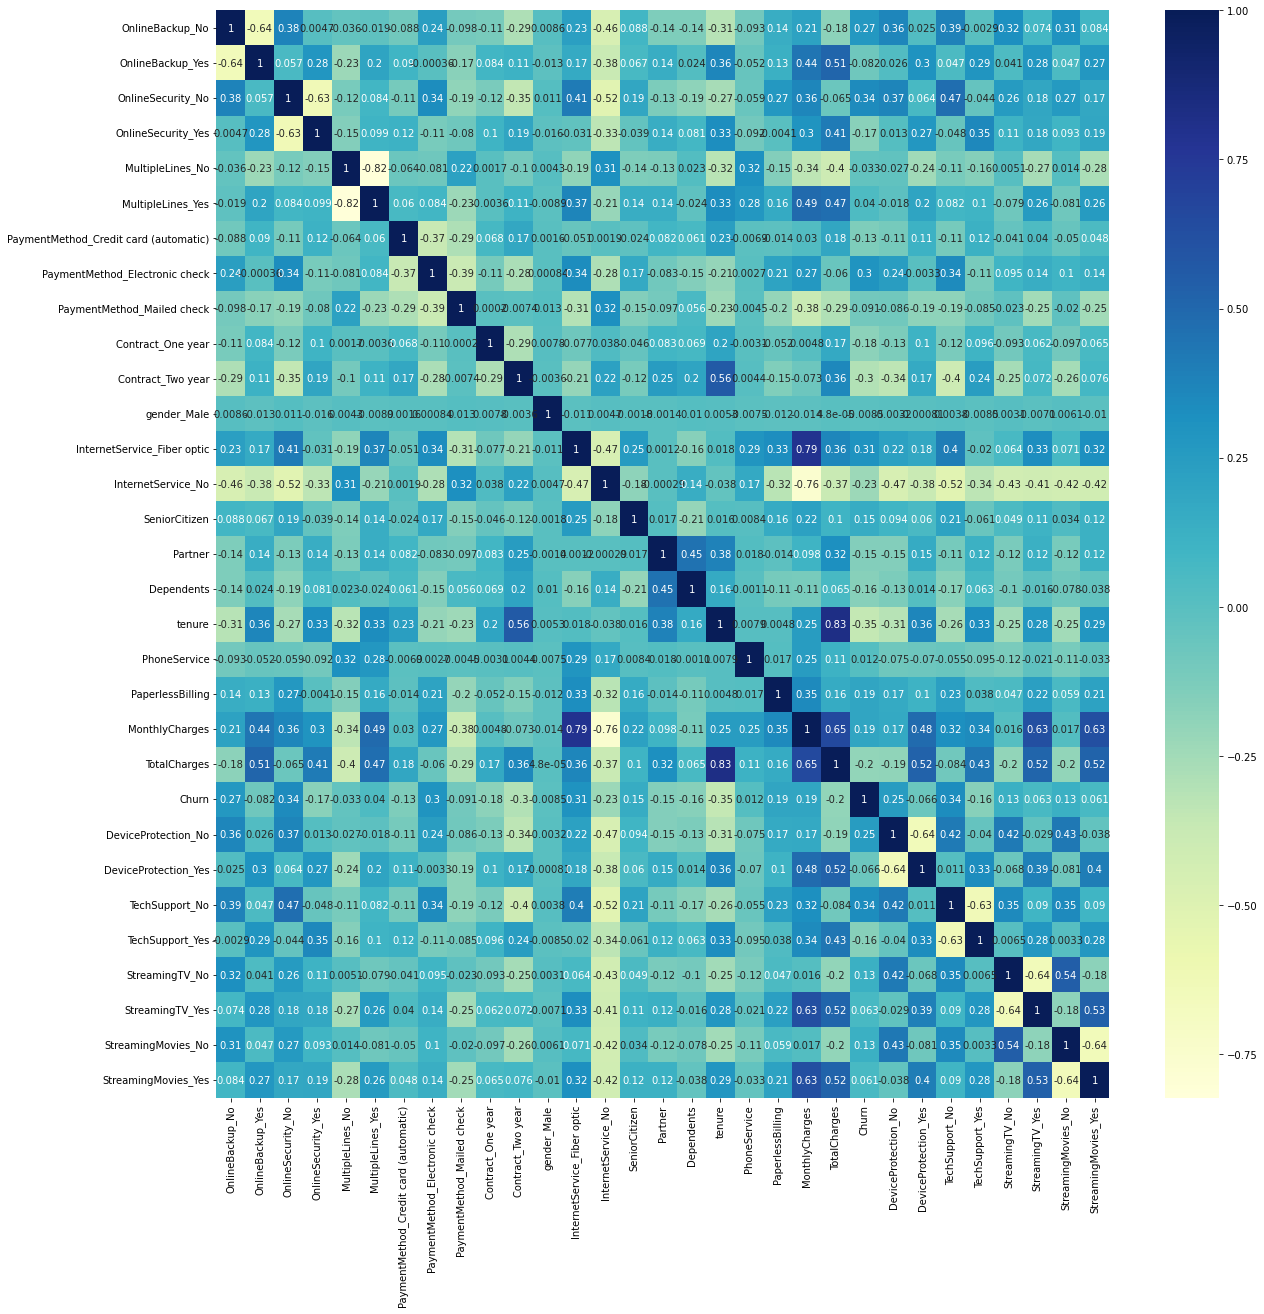

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(telecom.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [42]:
# Building the model using stats model library
import statsmodels.api as sm


In [43]:
X_train_logm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_logm,family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 09 Jan 2023   Deviance:                       4009.4
Time:                        18:57:21   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Feature selection using RFE

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [45]:
logreg=LogisticRegression()

In [46]:
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [47]:
rfe.support_

array([False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True])

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('OnlineBackup_Yes', False, 5),
 ('OnlineSecurity_Yes', False, 2),
 ('MultipleLines_Yes', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [49]:
cols=X_train.columns[rfe.support_]

In [50]:
cols

Index(['MultipleLines_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No', 'SeniorCitizen',
       'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [51]:
# Assesing the model using stats model
X_train_sm1=sm.add_constant(X_train[cols])
logm2=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res1=logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Mon, 09 Jan 2023   Deviance:                       4022.2
Time:                        18:57:22   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [52]:
# Getting the predicted values 
y_train_pred=res1.predict(X_train_sm1)
y_train_pred

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
          ...   
79      0.015336
3934    0.126458
5964    0.039247
6947    0.129142
5649    0.031459
Length: 4922, dtype: float64

##### Creating a data frame with the churn flag and the probability


In [53]:
churndf=pd.DataFrame({"Churn":y_train.values,"Churn probability":y_train_pred})
churndf["CustId"]=y_train.index
churndf.head()

,Churn,Churn probability,CustId
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


In [54]:
# Adding a column "predicted churn" if churn probabity <0.5 the customer will churn
churndf["Predicted Churn"]=churndf["Churn probability"].apply(lambda x:1 if x>0.5 else 0)
churndf.head()

,Churn,Churn probability,CustId,Predicted Churn
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [55]:
# Seeing metrics 
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [56]:
confusion=metrics.confusion_matrix(churndf["Churn"],churndf["Predicted Churn"])
print(confusion)

[[3275  360]
 [ 574  713]]


In [57]:
#predicted     not churn     churn
#actual
# not churn      3275        360
# churn          574         713 

In [58]:
tn=confusion[0][0] # true negatives
tp=confusion[1][1] # true positives
fp=confusion[0,1] # false positives
fn=confusion[1,0] # false neagtives

In [59]:
# Printing accuracy of the data set
accuracy=metrics.accuracy_score(churndf["Churn"],churndf["Predicted Churn"])

In [60]:
print(accuracy)

0.8102397399431126


# Checking for the VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif=pd.DataFrame()


In [63]:
vif['Features'] = X_train[cols].columns


In [64]:
vif["VIF"]=[variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]

In [65]:
vif=vif.sort_values("VIF",ascending=False)

In [66]:
vif

,Features,VIF
10,MonthlyCharges,14.848268
11,TotalCharges,10.418581
8,tenure,7.378458
5,InternetService_Fiber optic,5.607472
6,InternetService_No,5.271052
4,Contract_Two year,3.144732
14,StreamingMovies_Yes,2.792727
13,StreamingTV_Yes,2.791697
9,PaperlessBilling,2.756535
0,MultipleLines_Yes,2.375806


In [67]:
# the variables Monthly Charges have the highest VIF there for it is not of much use therefore let us drop it
cols=cols.drop("MonthlyCharges",1)

In [68]:
#Again training the model and finding the performance metrics
# Assesing the model using stats model
X_train_sm1=sm.add_constant(X_train[cols])
logm2=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res1=logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Mon, 09 Jan 2023   Deviance:                       4046.2
Time:                        18:57:23   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,TotalCharges,7.46
8,tenure,6.90
4,Contract_Two year,3.07
5,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
9,PaperlessBilling,2.55
6,InternetService_No,2.44
0,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [70]:
#Dropping the variable total charges
cols=cols.drop("TotalCharges",1)


In [71]:
#Again training the model and finding the performance metrics
# Assesing the model using stats model
X_train_sm1=sm.add_constant(X_train[cols])
logm2=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res1=logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Mon, 09 Jan 2023   Deviance:                       4051.9
Time:                        18:57:23   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
5,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
9,PaperlessBilling,2.45
0,MultipleLines_Yes,2.24
8,tenure,2.04
6,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [73]:
# Now we have correct amount of variables therefore lets re predict the values
y_train_pred=res1.predict(X_train_sm1)

In [74]:
churndf=pd.DataFrame({"Churn":y_train.values,"Churn probability":y_train_pred})
churndf["CustId"]=y_train.index
# Adding a column "predicted churn" if churn probabity <0.5 the customer will churn
churndf["Predicted Churn"]=churndf["Churn probability"].apply(lambda x:1 if x>0.5 else 0)
churndf.head()

,Churn,Churn probability,CustId,Predicted Churn
879,0,0.245817,879,0
5790,0,0.265361,5790,0
6498,1,0.669410,6498,1
880,1,0.630970,880,1
2784,1,0.682916,2784,1


In [75]:
accuracy=metrics.accuracy_score(churndf["Churn"],churndf["Predicted Churn"])

In [76]:
accuracy

0.8061763510767981

In [77]:
#Overall confusion matrix
confusion=metrics.confusion_matrix(churndf["Churn"],churndf["Predicted Churn"])
print(confusion)

[[3278  357]
 [ 597  690]]


In [78]:
#predicted     not churn     churn
#actual
# not churn      3278       357
# churn          597        690 

# Calcuating other performance metrices

In [79]:
tn=confusion[0][0] # true negatives
tp=confusion[1][1] # true positives
fp=confusion[0,1] # false positives
fn=confusion[1,0] # false neagtives

In [80]:
Senstivity=tp/(tp+fn)
Specivity=tn/(tn+fp)


In [81]:
Senstivity

0.5361305361305362

In [82]:
Specivity

0.9017881705639614

In [83]:
TPR=tp/(tp+fn)
FPR=fp/(tn+fp)

In [84]:
TPR

0.5361305361305362

In [85]:
FPR

0.09821182943603851

In [86]:
Precison=tp/(tp+fp)
Recall=tp/(tp+fn)

In [87]:
Precison

0.6590257879656161

In [88]:
Recall

0.5361305361305362

# Model Evaluation on Test Data

In [89]:
X_test

,OnlineBackup_Yes,OnlineSecurity_Yes,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,...,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,0,0,1,0,0,0,0,1,1,...,0,24,1,1,79.85,2001.00,0,0,0,1
3730,1,0,1,1,0,0,0,0,0,1,...,0,57,1,1,104.50,5921.35,1,0,1,1
1761,0,0,1,1,0,0,0,1,1,0,...,0,58,1,1,24.45,1513.60,0,0,0,0
2283,0,0,0,0,0,1,0,0,1,1,...,0,1,1,1,71.55,71.55,0,0,0,0
1872,0,0,0,0,0,0,0,1,0,0,...,1,41,1,0,19.70,804.25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1,1,1,0,0,0,1,0,1,0,...,0,63,1,0,68.80,4111.35,1,1,0,0
3508,1,1,1,0,0,0,0,1,0,1,...,0,70,1,1,113.65,7939.25,1,1,1,1
6765,0,0,1,0,0,0,0,1,0,0,...,1,69,1,1,25.60,1673.40,0,0,0,0
3598,0,0,0,0,1,0,0,0,1,0,...,0,1,1,0,46.30,46.30,0,0,0,0


In [90]:
X_test[["MonthlyCharges","TotalCharges","tenure"]]=scaler.transform(X_test[["MonthlyCharges","TotalCharges","tenure"]])

In [91]:
X_test.head()

,OnlineBackup_Yes,OnlineSecurity_Yes,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,...,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,0,0,1,0,0,0,0,1,1,...,0,-0.347623,1,1,0.499951,-0.128378,0,0,0,1
3730,1,0,1,1,0,0,0,0,0,1,...,0,0.999203,1,1,1.319685,1.600302,1,0,1,1
1761,0,0,1,1,0,0,0,1,1,0,...,0,1.040015,1,1,-1.342374,-0.343297,0,0,0,0
2283,0,0,0,0,0,1,0,0,1,1,...,0,-1.286319,1,1,0.223935,-0.979170,0,0,0,0
1872,0,0,0,0,0,0,0,1,0,0,...,1,0.346196,1,0,-1.500335,-0.656086,0,0,0,0


In [92]:
X_test1=X_test[cols]

In [94]:
X_test1.head()

,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,SeniorCitizen,tenure,PaperlessBilling,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,1,0,0,0,1,0,0,-0.347623,1,0,0,1
3730,1,1,0,0,0,1,0,0,0.999203,1,0,1,1
1761,1,1,0,0,1,0,1,0,1.040015,1,0,0,0
2283,0,0,1,0,0,1,0,0,-1.286319,1,0,0,0
1872,0,0,0,0,1,0,1,0,0.346196,0,0,0,0


In [95]:
X_testlm=sm.add_constant(X_test1)

In [96]:
y_test_pred=res1.predict(X_testlm)

In [97]:
y_test_pred

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
          ...   
1289    0.023041
3508    0.054121
6765    0.008348
3598    0.503619
4987    0.005487
Length: 2110, dtype: float64

In [98]:
# Creating the data frame for churn
churndf2=pd.DataFrame({"Churn":y_test,"Churn prob":y_test_pred})
churndf2["CustomID"]=X_testlm.index

In [99]:
churndf2

,Churn,Churn prob,CustomID
942,0,0.419725,942
3730,1,0.260232,3730
1761,0,0.008650,1761
2283,1,0.592626,2283
1872,0,0.013989,1872
...,...,...,...
1289,0,0.023041,1289
3508,0,0.054121,3508
6765,0,0.008348,6765
3598,0,0.503619,3598


In [100]:
churndf2["Predicted Churn"]=churndf2["Churn prob"].apply(lambda x:1 if x>0.5 else 0)

In [101]:
churndf2

,Churn,Churn prob,CustomID,Predicted Churn
942,0,0.419725,942,0
3730,1,0.260232,3730,0
1761,0,0.008650,1761,0
2283,1,0.592626,2283,1
1872,0,0.013989,1872,0
...,...,...,...,...
1289,0,0.023041,1289,0
3508,0,0.054121,3508,0
6765,0,0.008348,6765,0
3598,0,0.503619,3598,1


In [105]:
accuracy_test=metrics.accuracy_score(churndf2["Churn"],churndf2["Predicted Churn"])

In [106]:
accuracy_test

0.7886255924170616

##### Therefore the model gives an accuracy of 78.86 on the test data set